In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import f1_score, roc_curve, auc

In [2]:
df_raw = pd.read_csv("rawdata/통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [3]:
df_raw.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [4]:
import numpy as np
df_raw["CHURN"] = np.where(df_raw["CHURN"] == "Active", 0, 1)
df_raw["GENDER"] = np.where(df_raw["GENDER"] == "F", 0, 1)
df_raw = df_raw.drop(["CUSTOMER_ID"], axis = 1)
df_raw = pd.get_dummies(df_raw)

df_raw.head()

,CHURN,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,0,31,33.33,6,218,379.8,9,21.6,366,...,0,0,0,0,0,0,1,0,0,0
1,0,1,27,30.87,10,373,656.4,11,28.0,411,...,0,0,0,0,0,0,1,0,0,0
2,0,1,27,49.40,11,260,582.0,0,0.0,265,...,0,0,0,0,0,0,1,0,0,0
3,0,1,61,48.60,1,294,661.8,14,101.5,326,...,0,0,0,0,0,0,1,0,0,0
4,0,0,52,56.03,0,221,555.6,7,25.0,274,...,0,0,0,0,0,0,1,0,0,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)

df_train_y = df_train["CHURN"]
df_train_x = df_train.drop(["CHURN"], axis = 1)
df_test_y = df_test["CHURN"]
df_test_x = df_test.drop(["CHURN"], axis = 1)

In [7]:
model = ["DecisionTree", "RandomForest", "GradientBoosting"]
model_f1_score = []
model_auc = []

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
train_accuracy = []; test_accuracy = []
estimator = DecisionTreeClassifier()

para_depth = [depth for depth in range (1, 11)]
para_split = [n_split * 10 for n_split in range (1, 11)]
para_leaf  = [n_leaf * 2 for n_leaf in range (1, 11)]

param_grid = {
    "max_depth" :para_depth,
    "min_samples_split":para_split,
    "min_samples_leaf" :para_leaf
}

grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

train_accuracy.append(grid_dt.score(df_train_x, df_train_y))
test_accuracy.append(grid_dt.score(df_test_x, df_test_y))

y_pred = grid_dt.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


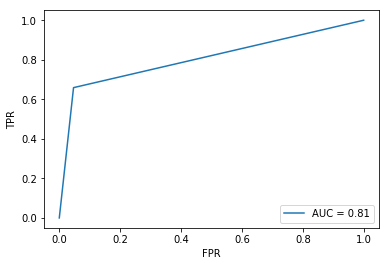

In [10]:
plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

In [11]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [12]:
estimator = RandomForestClassifier(n_estimators = 100)

para_depth = [depth for depth in range (1, 11)]
para_leaf  = [n_leaf * 2 for n_leaf in range (1, 11)]

param_grid = {
    "max_depth" :para_depth,
    "min_samples_leaf" :para_leaf
}

grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

train_accuracy.append(grid_rf.score(df_train_x, df_train_y))
test_accuracy.append(grid_rf.score(df_test_x, df_test_y))

y_pred = grid_rf.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


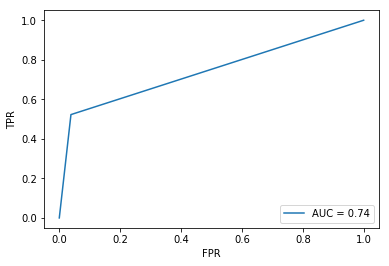

In [13]:
plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

In [14]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [15]:
estimator = GradientBoostingClassifier()

para_lr = [lr * 0.1 for lr in range (1, 10)]
para_depth = [depth for depth in range (1, 11)]
para_leaf  = [n_leaf * 2 for n_leaf in range (1, 11)]

param_grid = {
    "learning_rate" :para_lr,
    "max_depth" :para_depth,
    "min_samples_leaf" :para_leaf
}

grid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

train_accuracy.append(grid_gb.score(df_train_x, df_train_y))
test_accuracy.append(grid_gb.score(df_test_x, df_test_y))

y_pred = grid_gb.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


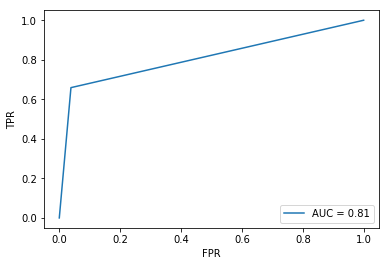

In [16]:
plt.plot(fpr, tpr, label = "AUC = %.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()

In [17]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [18]:
train_accuracy

[0.9078341013824884, 0.9308755760368663, 0.9124423963133641]

In [19]:
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy
df_eval["TestAccuracy"]  = test_accuracy
df_eval["F1Score"] = model_f1_score
df_eval["AUD"] = model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUD
DecisionTree,0.908,0.907,0.690,0.806
RandomForest,0.931,0.892,0.605,0.742
GradientBoosting,0.912,0.914,0.707,0.810


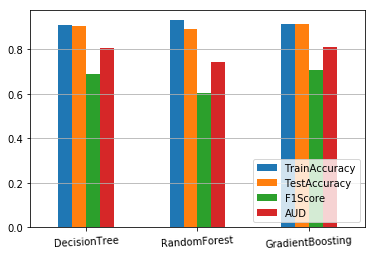

In [20]:
df_eval.plot.bar(rot = 3)
plt.legend(loc="lower right")
plt.grid(axis = "y")